<a href="https://colab.research.google.com/github/Manish-k723/United-Airlines/blob/main/Pre_Order_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/united.zip','r') as zip_ref:
  zip_ref.extractall('/content')

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc = rc)

palette_color = sns.color_palette('dark')
palette1 = ['dimgrey','crimson']
palette2 = ['crimson', 'dimgrey']
palette3 = ['darkgreen', 'orange']
palette4 = ['salmon','mediumseagreen']
palette5 = ['mediumseagreen','salmon']
palette6 = sns.color_palette("YlOrBr")

pd.options.display.max_columns = 50

In [ ]:
pre_df = pd.read_csv('/content/Datasets/Inflight Service_Pre order data.csv', parse_dates = ['scheduled_departure_dtl'])
pre_df.shape

(212039, 13)

In [ ]:
survey_df = pd.read_csv('/content/Datasets/Survey data_Inflight Satisfaction Score.csv', parse_dates = ['scheduled_departure_date'])
survey_df.shape

(47074, 31)

In [ ]:
pre_df = pre_df.rename(columns={'scheduled_departure_dtl': 'scheduled_departure_date', 'departure_station_code':'origin_station_code','arrival_station_code':'destination_station_code'})

In [ ]:
merged_df = pre_df.merge(survey_df, on=['flight_number','origin_station_code','destination_station_code','record_locator', 'scheduled_departure_date'], how='left')

In [ ]:
merged_df.shape

(214430, 39)

In [ ]:
pre_df.isna().sum()

flight_number                   0
origin_station_code             0
destination_station_code        0
record_locator                  0
carrier_code                    0
scheduled_departure_date        0
cabin_code                      0
meal_group                  20311
meal_category               20311
meal_short_description          0
meal_description            74977
is_entree                   20311
pre_order_qty                   0
dtype: int64

In [ ]:
x = ['flight_number_x', 'origin_station_code', 'destination_station_code',
       'record_locator', 'carrier_code', 'scheduled_departure_date',
       'cabin_code', 'meal_group', 'meal_category', 'meal_short_description',
       'meal_description', 'is_entree', 'pre_order_qty', 'score', 'satisfaction_type', 'loyalty_program_level']

merged_df.head()

,flight_number,origin_station_code,destination_station_code,record_locator,carrier_code,scheduled_departure_date,cabin_code,meal_group,meal_category,meal_short_description,meal_description,is_entree,pre_order_qty,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,arrival_delay_minutes,arrival_delay_group,cabin_code_desc,cabin_name,entity,number_of_legs,seat_factor_band,loyalty_program_level,generation,fleet_type_description,fleet_usage,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,1423,INX,DEX,B3XX1H,UA,2022-09-01,J,ENTREES HOT,POULTRY,"Za'atar chicken with spinach, roasted peppers,...","Za'atar chicken with spinach, roasted peppers,...",Y,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1620,IAX,CUX,BFXXJC,UA,2022-09-02,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1852,ORX,PDX,DPXX2H,UA,2022-09-02,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,1,What item did you choose?,other (specify),NaN,food & beverage,comp,-12.0,Early & Ontime,Business,NaN,Domestic,1.0,80+,premier platinum,Boomer,B737-900,Mainline,37K,UA,1739.0,Medium,C24,E6,Domestic,member,VIASAT,hub departure
3,1852,ORX,PDX,DPXX2H,UA,2022-09-02,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,1,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,-12.0,Early & Ontime,Business,NaN,Domestic,1.0,80+,premier platinum,Boomer,B737-900,Mainline,37K,UA,1739.0,Medium,C24,E6,Domestic,member,VIASAT,hub departure
4,548,IAX,SFX,ELXX8H,UA,2022-09-02,J,ENTREES HOT,BREAKFAST,Scrambled eggs,"Scrambled eggs with ham, onion and peppers",Y,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


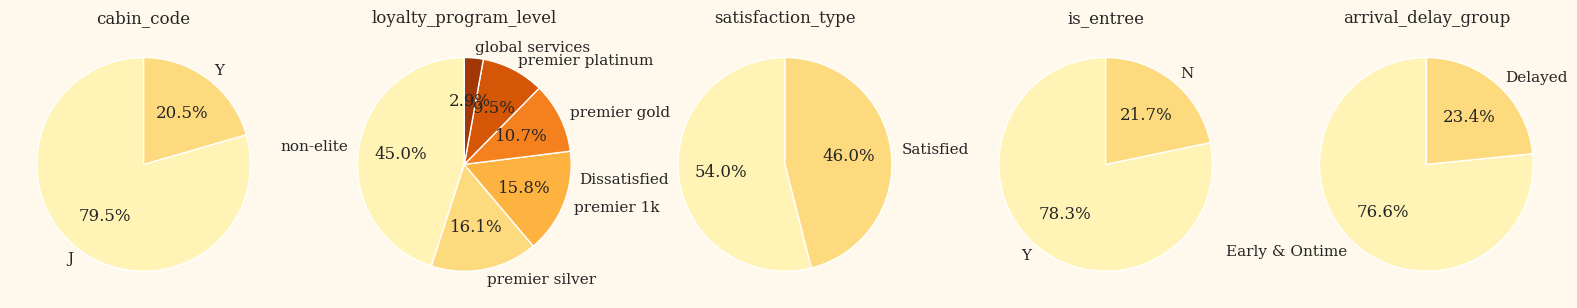

In [ ]:
for_pie_cols = ['cabin_code', 'loyalty_program_level', 'satisfaction_type', 'is_entree', 'arrival_delay_group']
fig, axes = plt.subplots(1,5, figsize = (20, 8))
for i, col in enumerate(for_pie_cols):
  column_count = merged_df[col].value_counts()
  size = column_count.values
  labels = column_count.index
  fig = axes[i].pie(size, labels = labels, colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%', startangle = 90)
  # fig.update_layout(title_text=col)
  axes[i].set_title(col)
plt.show()

In [ ]:
df = merged_df.copy()

In [ ]:
# df.drop(['flight_number_x','departure_station_code','arrival_station_code','record_locator','carrier_code'], axis = 1, inplace = True)

KeyError: ignored

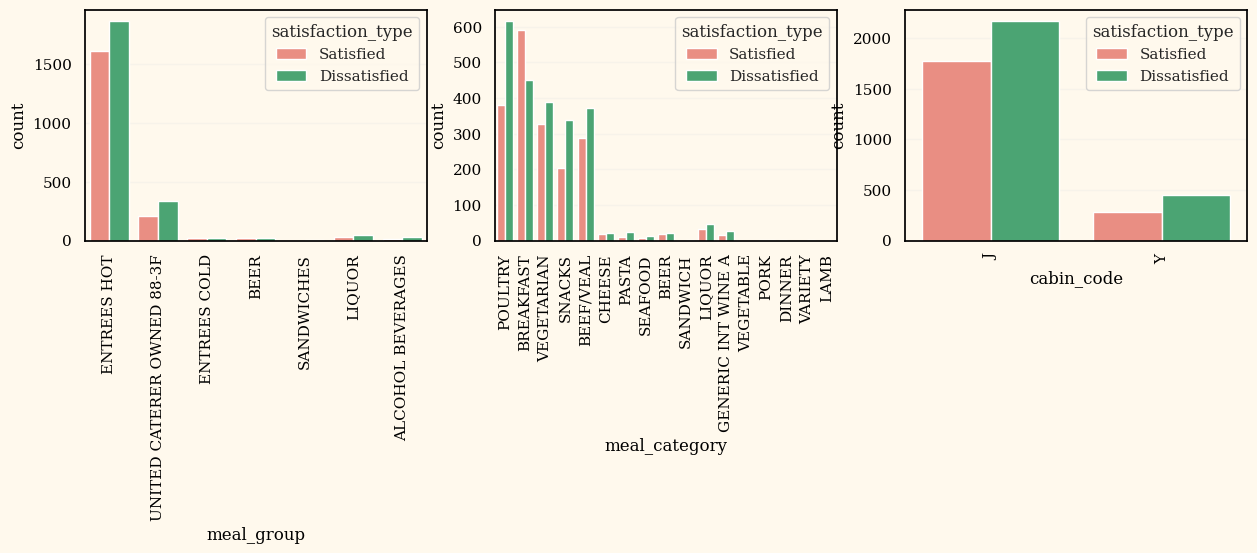

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15, 3))
sns.countplot(data = df, x = 'meal_group', hue = 'satisfaction_type', ax = axes[0], palette = palette4)
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(data = df, x = 'meal_category', hue = 'satisfaction_type', ax = axes[1], palette = palette4)
axes[1].tick_params(axis='x', rotation=90)

sns.countplot(data = df, x = 'cabin_code', hue = 'satisfaction_type', ax = axes[2], palette = palette4)
axes[2].tick_params(axis='x', rotation=90)

<Axes: xlabel='pre_order_qty', ylabel='count'>

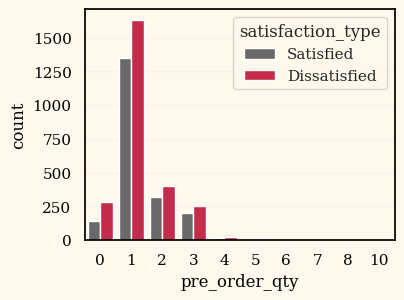

In [ ]:
plt.figure(figsize = (4,3))
temp = df['pre_order_qty'].value_counts().head(10).index.tolist()
df_filtered = df[df['pre_order_qty'].isin(temp)]

sns.countplot(data=df_filtered, x='pre_order_qty', hue='satisfaction_type', palette = palette1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'POULTRY'),
  Text(1, 0, 'BREAKFAST'),
  Text(2, 0, 'VEGETARIAN'),
  Text(3, 0, 'SNACKS'),
  Text(4, 0, 'BEEF/VEAL'),
  Text(5, 0, 'CHEESE'),
  Text(6, 0, 'PASTA'),
  Text(7, 0, 'SEAFOOD'),
  Text(8, 0, 'BEER'),
  Text(9, 0, 'SANDWICH'),
  Text(10, 0, 'LIQUOR'),
  Text(11, 0, 'GENERIC INT WINE A'),
  Text(12, 0, 'VEGETABLE'),
  Text(13, 0, 'PORK'),
  Text(14, 0, 'DINNER'),
  Text(15, 0, 'VARIETY'),
  Text(16, 0, 'LAMB')])

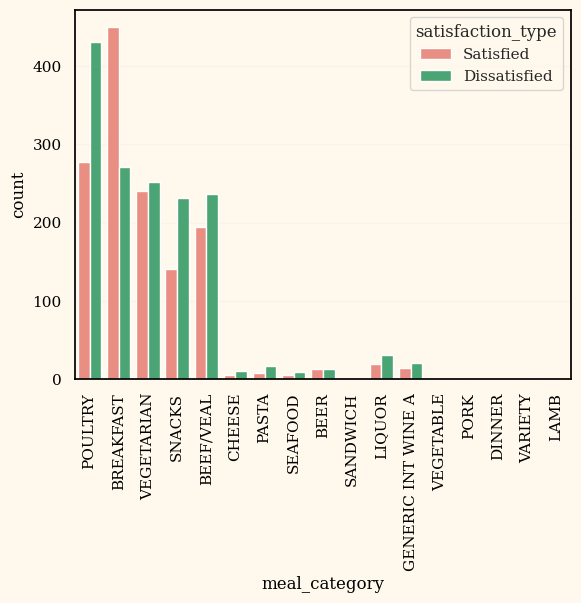

In [ ]:
sns.countplot(data = df, x = 'meal_category', hue = 'satisfaction_type', palette = palette4)
plt.xticks(rotation = 90)